In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import keras

# Netzwerk Konfigurationen
TestDataPercentage = .1
num_epochs = 5

# Schritt 1: Daten vorbereiten
# Laden der Daten
data = np.load('data/ook_dataset.npz')
signals = data['signals']
labels = data['labels']

# Datensets vorbereiten
test_signals = signals[:int(TestDataPercentage*len(signals))]
test_labels = labels[:int(TestDataPercentage*len(labels))]
train_signals = signals[int(TestDataPercentage*len(signals)):]
train_labels = labels[int(TestDataPercentage*len(labels)):]

# Schritt 2: Netzwerkarchitektur definieren
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=(signals.shape[1],)),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(labels.shape[1], activation='sigmoid')
])

# Modell kompilieren
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Schritt 3: Trainingsprozess
model.fit(train_signals, train_labels, epochs=num_epochs, batch_size=32)

# Schritt 4: Evaluation
test_loss, test_acc = model.evaluate(test_signals, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

model.summary()

# Modell speichern
model.save('data/ook_net_tf.keras')

2024-05-14 10:22:24.232638: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 10:22:24.277529: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Epoch 1/5


2024-05-14 10:22:25.691433: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2813/2813 [==============================] - 2s 534us/step - loss: 0.5480 - accuracy: 0.7822
Epoch 2/5
2813/2813 [==============================] - 1s 508us/step - loss: 0.2408 - accuracy: 0.9278
Epoch 3/5
2813/2813 [==============================] - 1s 511us/step - loss: 0.1651 - accuracy: 0.9467
Epoch 4/5
2813/2813 [==============================] - 1s 513us/step - loss: 0.1505 - accuracy: 0.9489
Epoch 5/5
2813/2813 [==============================] - 1s 509us/step - loss: 0.1448 - accuracy: 0.9494
313/313 - 0s - loss: 0.1452 - accuracy: 0.9488 - 191ms/epoch - 611us/step

Test accuracy: 0.9488000273704529
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 202       
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                    

### Testen und spielen mit dem trainierten Netzwerk

1/1 [==============================] - 0s 12ms/step
Predicted binary data of the test sequence: [0. 1. 1. 0. 0. 1. 0. 1. 0. 1.]


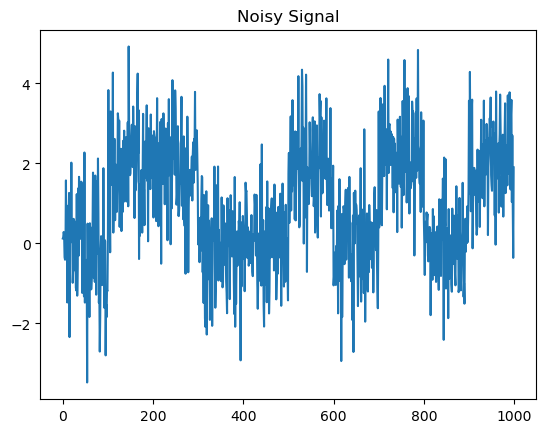

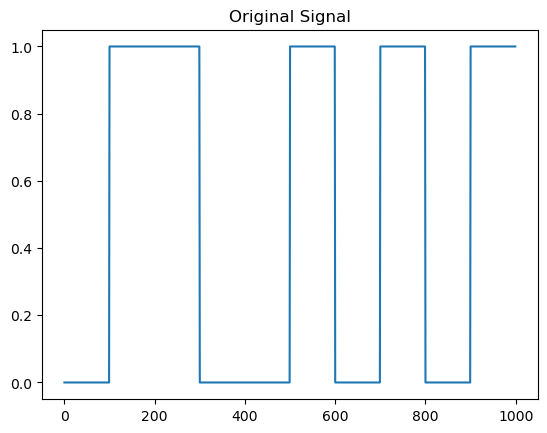

In [7]:
model = keras.models.load_model('data/tes_new.keras')

# Erzeugen einer Testsequenz
test_sequence = np.array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1])

# Gesampletes Signal mit 100 Samples pro Symbol (Bit) erzeugen, dass mit Rauschen überlagert ist und vom Modell vorhergesagt wird
test_signal = np.repeat(test_sequence, 100)
amplitude = 2
noise_level = 1

# Rauschen hinzufügen
test_signal_noisy = amplitude*test_signal + np.random.normal(0, noise_level, len(test_signal))

# Vorhersage des Modells
predicted_sequence = []
for i in range(0, len(test_signal_noisy), 100):
    predicted_sequence.append(model.predict(np.expand_dims(test_signal_noisy[i:i+100], axis=0)).round())

predicted_sequence = np.array(predicted_sequence).flatten()
# Ausgabe der Vorhersage
print(f'Predicted binary data of the test sequence: {predicted_sequence}')

# Vergleich der Vorhersage mit dem Original
plt.figure()
plt.plot(test_signal_noisy)
plt.title('Noisy Signal')
plt.show()

plt.figure()
# upsampling
plt.plot(np.repeat(predicted_sequence, 100))
plt.title('Original Signal')
plt.show()